<a href="https://colab.research.google.com/github/anatoledodata/Analisis-Churn-Telecom/blob/main/Analisis_Churn_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis TelecomX

##📌 Extracción

In [68]:
import pandas as pd

In [69]:
url = 'https://raw.githubusercontent.com/anatoledodata/Analisis-Churn-Telecom/refs/heads/main/TelecomX_Data.json'
datos = pd.read_json(url)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##🔧 Transformación

###Conociendo conjunto de datos

In [70]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [71]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [72]:
datos.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [73]:
datos.isna().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


###Arreglando inconsistencias

In [74]:
columnas = list(datos.columns)

In [75]:
type(datos)

pandas.core.frame.DataFrame

In [76]:
datos.shape

(7267, 6)

In [77]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [78]:
customer_df = pd.json_normalize(datos["customer"])
phone_df    = pd.json_normalize(datos["phone"])
internet_df = pd.json_normalize(datos["internet"])
account_df  = pd.json_normalize(datos["account"])


In [79]:
datos = pd.concat(
    [
        datos[["customerID", "Churn"]],
        customer_df,
        phone_df,
        internet_df,
        account_df
    ],
    axis=1
)


In [80]:
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [81]:
datos.index.is_unique

True

In [82]:
datos['customerID'].is_unique

True

####Transformacion de datos numericos

In [83]:
import numpy as np

In [84]:
datos['Charges.Monthly'].value_counts()

,count
Charges.Monthly,
20.05,65
19.90,46
19.85,46
19.55,45
19.70,45
...,...
87.90,1
87.60,1
52.20,1


In [85]:
pd.unique(datos['Charges.Monthly'])

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [86]:
datos['Charges.Monthly'].isna().sum()

np.int64(0)

In [87]:
datos['Charges.Monthly'].isnull().sum()

np.int64(0)

In [88]:
datos['Charges.Total'].isna().sum()

np.int64(0)

In [89]:
columnas_numericas = ['Charges.Monthly', 'Charges.Total']

datos[columnas_numericas] = datos[columnas_numericas].apply(
    pd.to_numeric, errors='coerce'
)


In [90]:
datos['Charges.Total'].isnull().sum()

np.int64(11)

In [91]:
# Filtramos el dataframe para ver solo las filas donde 'Charges.Total' terminó siendo nulo
filas_con_nulos = datos[datos['Charges.Total'].isnull()]

print(filas_con_nulos[['customerID', 'tenure', 'Charges.Monthly', 'Charges.Total']])

      customerID  tenure  Charges.Monthly  Charges.Total
975   1371-DWPAZ       0            56.05            NaN
1775  2520-SGTTA       0            20.00            NaN
1955  2775-SEFEE       0            61.90            NaN
2075  2923-ARZLG       0            19.70            NaN
2232  3115-CZMZD       0            20.25            NaN
2308  3213-VVOLG       0            25.35            NaN
2930  4075-WKNIU       0            73.35            NaN
3134  4367-NUYAO       0            25.75            NaN
3203  4472-LVYGI       0            52.55            NaN
4169  5709-LVOEQ       0            80.85            NaN
5599  7644-OMVMY       0            19.85            NaN


In [92]:
datos['Charges.Total'] = datos['Charges.Total'].fillna(0.0)

In [93]:
print(f"Nulos restantes: {datos['Charges.Total'].isnull().sum()}")

Nulos restantes: 0


In [94]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [95]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


####Valores textuales a binarios

In [96]:
pd.set_option('display.max_columns', None)

In [97]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [98]:
#Varificar valores de columnas a convertir
cols_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling'
]

In [99]:
for col in cols_binarias:
    print(f"{col}: {datos[col].unique()}")

Churn: ['No' 'Yes' '']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']


Manejo de valores vacios en churn

In [100]:
datos['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [101]:
datos['Churn'] = datos['Churn'].replace('', np.nan)

In [102]:
antes = len(datos)
datos.dropna(subset=['Churn'], inplace=True)
despues = len(datos)

print(f"Filas eliminadas por falta de etiqueta Churn: {antes - despues}")

Filas eliminadas por falta de etiqueta Churn: 224


Estandarizar 'No'

In [103]:
cols_a_limpiar = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]

In [104]:
for col in cols_a_limpiar:
    datos[col] = datos[col].replace({'No internet service': 'No', 'No phone service': 'No'})

    print(f"{col}: {datos[col].unique()}")

MultipleLines: ['No' 'Yes']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']


Transformacion a Binario

In [105]:
diccionario = {'Yes': 1, 'No': 0}

for col in cols_binarias:
    datos[col] = datos[col].map(diccionario)
    print(f"{col}: {datos[col].unique()}")

Churn: [0 1]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]


In [106]:
pd.unique(datos['gender'])

array(['Female', 'Male'], dtype=object)

In [107]:
datos['gender'] = datos['gender'].map({'Female': 1, 'Male': 0})
datos['gender'].unique()

array([1, 0])

In [108]:
print(datos[cols_binarias].dtypes)

Churn               int64
Partner             int64
Dependents          int64
PhoneService        int64
MultipleLines       int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
PaperlessBilling    int64
dtype: object


Columna de cuenta diaria

In [109]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [110]:
datos['Charges.Daily'] = datos['Charges.Monthly']/30
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [111]:
datos['Charges.Daily'] = datos['Charges.Daily'].round(2)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [112]:
cargos_cero = datos[datos['Charges.Monthly'] <= 0]
print(f"Clientes con cargos de $0 o menos: {len(cargos_cero)}")

Clientes con cargos de $0 o menos: 0


In [113]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   int64  
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 
 17  

##📊 Carga y análisis

###Analisis descriptivo

####Analisis numerico

In [114]:
cols_a_analizar = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily']

In [115]:
datos_numericos = datos[cols_a_analizar].describe().T
datos_numericos

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Charges.Monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Charges.Total,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Charges.Daily,7043.0,2.158675,1.003088,0.61,1.18,2.34,2.99,3.96


In [116]:
# Ver clientes con cargos totales de 0
print(datos[datos['Charges.Total'] == 0][['tenure', 'Charges.Monthly', 'Charges.Total']])

      tenure  Charges.Monthly  Charges.Total
975        0            56.05            0.0
1775       0            20.00            0.0
1955       0            61.90            0.0
2075       0            19.70            0.0
2232       0            20.25            0.0
2308       0            25.35            0.0
2930       0            73.35            0.0
3134       0            25.75            0.0
3203       0            52.55            0.0
4169       0            80.85            0.0
5599       0            19.85            0.0


####Analisis demografico

In [117]:
perfil_cliente = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

In [118]:
print("--- Perfil Demográfico del Cliente (Promedios) ---")
print(datos[perfil_cliente].mean())

--- Perfil Demográfico del Cliente (Promedios) ---
gender           0.495244
SeniorCitizen    0.162147
Partner          0.483033
Dependents       0.299588
dtype: float64


####Analisis de servicios

In [119]:
servicios = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [120]:
print("\n--- Adopción de Servicios y Facturación ---")
print(datos[servicios].mean())


--- Adopción de Servicios y Facturación ---
PhoneService        0.903166
MultipleLines       0.421837
OnlineSecurity      0.286668
OnlineBackup        0.344881
DeviceProtection    0.343888
TechSupport         0.290217
StreamingTV         0.384353
StreamingMovies     0.387903
PaperlessBilling    0.592219
dtype: float64


###Recuento de evasión


In [121]:
total_clientes = len(datos)
clientes_fugados = datos['Churn'].sum()
tasa_churn = (clientes_fugados / total_clientes) * 100

print(f"Total de clientes: {total_clientes}")
print(f"Clientes que se fueron: {clientes_fugados}")
print(f"Tasa de Churn: {tasa_churn:.2f}%")

Total de clientes: 7043
Clientes que se fueron: 1869
Tasa de Churn: 26.54%


###Recuento de evasión por variables categóricas



####Variables categoricas con valores binarios

In [122]:
analisis_fuga = datos.groupby('Churn')[ perfil_cliente+ servicios].mean().T
analisis_fuga

Churn,0,1
gender,0.492656,0.502408
SeniorCitizen,0.128721,0.254682
Partner,0.528218,0.357945
Dependents,0.344801,0.174425
PhoneService,0.901044,0.909042
MultipleLines,0.409934,0.454789
OnlineSecurity,0.333204,0.157838
OnlineBackup,0.368380,0.279829
DeviceProtection,0.362775,0.291600
TechSupport,0.335137,0.165864


In [123]:
analisis_fuga['Diferencia'] = analisis_fuga[0] - analisis_fuga[1]

In [124]:
print("\n--- DIFERENCIAL DE CHURN (Stayers vs Leavers) ---")
analisis_fuga.sort_values(by='Diferencia')


--- DIFERENCIAL DE CHURN (Stayers vs Leavers) ---


Churn,0,1,Diferencia
PaperlessBilling,0.535562,0.749064,-0.213501
SeniorCitizen,0.128721,0.254682,-0.125961
StreamingTV,0.365868,0.435527,-0.069659
StreamingMovies,0.369927,0.437667,-0.067741
MultipleLines,0.409934,0.454789,-0.044854
gender,0.492656,0.502408,-0.009752
PhoneService,0.901044,0.909042,-0.007999
DeviceProtection,0.362775,0.291600,0.071176
OnlineBackup,0.368380,0.279829,0.088552
TechSupport,0.335137,0.165864,0.169273


####Variables categoricas con mas de dos valores

In [125]:
datos['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [126]:
vars_interes = ['Contract', 'PaymentMethod', 'InternetService']

for var in vars_interes:
    print(f"\n--- Análisis de {var} ---")
    tabla = pd.crosstab(datos[var], datos['Churn'], normalize='index') * 100
    tabla.sort_values(by=1, ascending=False, inplace=True)
    print(tabla)


--- Análisis de Contract ---
Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858

--- Análisis de PaymentMethod ---
Churn                              0          1
PaymentMethod                                  
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101

--- Análisis de InternetService ---
Churn                    0          1
InternetService                      
Fiber optic      58.107235  41.892765
DSL              81.040892  18.959108
No               92.595020   7.404980


In [127]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


###Recuento de evasión por variables numericas

In [128]:
pd.pivot_table(datos, index='Churn', values=cols_a_analizar, aggfunc=['mean', 'median']).T

Churn                             0            1
mean   Charges.Daily       2.042080     2.481450
       Charges.Monthly    61.265124    74.441332
       Charges.Total    2549.911442  1531.796094
       tenure             37.569965    17.979133
median Charges.Daily       2.150000     2.660000
       Charges.Monthly    64.425000    79.650000
       Charges.Total    1679.525000   703.550000
       tenure             38.000000    10.000000

###Graficos

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

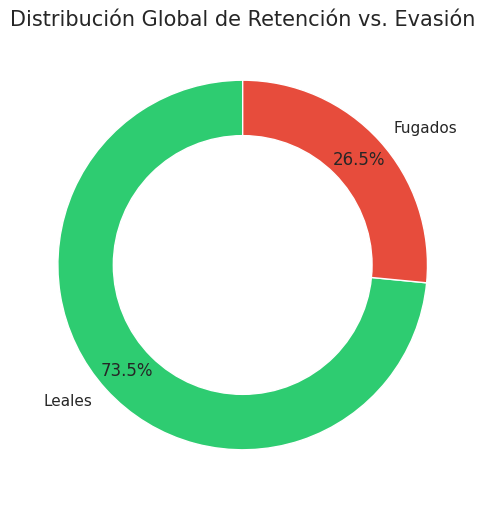

In [130]:
#Distribución Global de Retención vs. Evasión
plt.figure(figsize=(6, 6))
plt.pie([total_clientes - clientes_fugados, clientes_fugados],
        labels=['Leales', 'Fugados'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#2ecc71', '#e74c3c'],
        pctdistance=0.85)

centro_circulo = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

plt.title('Distribución Global de Retención vs. Evasión', fontsize=15)
plt.show()

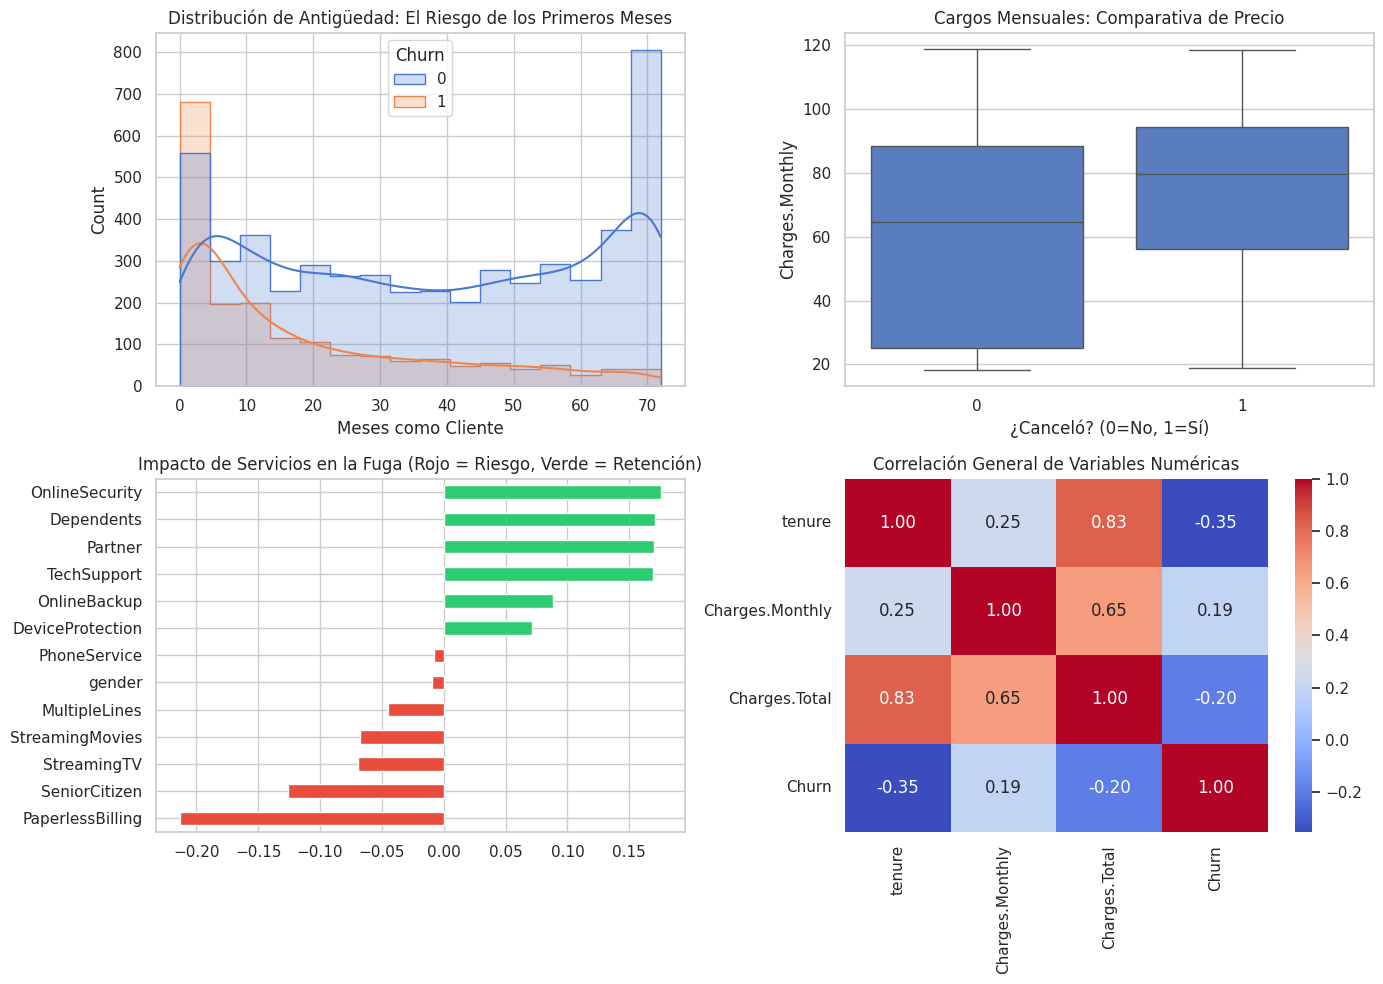

In [131]:
# Configuracion de estilo
sns.set_theme(style="whitegrid", palette="muted")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# GRAFICO 1: El "Muro de los 10 meses" (Histograma de Tenure)
sns.histplot(data=datos, x='tenure', hue='Churn', kde=True, ax=axes[0,0], element="step")
axes[0,0].set_title('Distribución de Antigüedad: El Riesgo de los Primeros Meses')
axes[0,0].set_xlabel('Meses como Cliente')

# GRAFICO 2: ¿El precio expulsa al cliente? (Boxplot de Cargos)
sns.boxplot(x='Churn', y='Charges.Monthly', data=datos, ax=axes[0,1])
axes[0,1].set_title('Cargos Mensuales: Comparativa de Precio')
axes[0,1].set_xlabel('¿Canceló? (0=No, 1=Sí)')

# GRAFICO 3: Servicios Protectores vs Riesgos (Diferencial que calculamos)
# Usaremos los datos del diferencial que ya tienes
diferencial_data = analisis_fuga['Diferencia'].sort_values()

diferencial_data.plot(kind='barh', ax=axes[1,0], color=(diferencial_data > 0).map({True: '#2ecc71', False:'#e74c3c' }))
axes[1,0].set_title('Impacto de Servicios en la Fuga (Rojo = Riesgo, Verde = Retención)')

# GRAFICO 4: Mapa de Correlación
sns.heatmap(datos[['tenure', 'Charges.Monthly', 'Charges.Total', 'Churn']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1,1])
axes[1,1].set_title('Correlación General de Variables Numéricas')

plt.tight_layout()
plt.show()

#**📊 Informe Final: Análisis de Evasión de Clientes (Churn)**
##**🔹 1. Introducción**
El **Churn** (o tasa de evasión) es una de las métricas más críticas en la industria de las telecomunicaciones. Representa el **porcentaje de clientes que deciden cancelar su servicio en un periodo determinado**.

**Objetivo del Proyecto**: Este análisis busca identificar los factores demográficos, de comportamiento y financieros que influyen en la decisión de un cliente de abandonar la empresa. El fin último es proporcionar una base sólida para que el equipo de Estrategia pueda implementar medidas preventivas y aumentar la retención.

### **📌 Snapshot del Negocio (Resumen Ejecutivo)**

| Métrica Clave | Valor Hallado | Impacto en el Negocio |
| :--- | :--- | :--- |
| **Tasa de Churn Global** | **~26.5%** | Nivel de alerta moderado-alto para la industria. |
| **Punto Crítico de Fuga** | **Mes 10** | Los clientes no superan el primer año de contrato. |
| **Perfil del Desertor** | **Contrato mensual** | El tipo de contrato es el mayor predictor de fuga. |
| **Factor Económico** | **Media > $70** | El Churn se concentra en los planes más costosos. |
| **Servicios Protectores** | **Seguridad y Soporte** | Su ausencia aumenta la probabilidad de salida. |


---


##**🔹 2. Limpieza y Tratamiento de Datos**
Para garantizar un análisis preciso, se realizaron los siguientes pasos de preparación:

*   **Importación y Aplanamiento**: Los datos se recibieron en formato JSON con estructuras anidadas. Se utilizó pd.json_normalize para transformar la información en una tabla plana de Pandas.

*   **Tratamiento de Binarias**: Se identificaron variables de texto (Yes/No, Male/Female) y se transformaron a formato numérico (0 y 1) mediante .map() y .replace() para permitir cálculos estadísticos.

*   **Ingeniería de Características**: Se creó la columna Charges.Daily para entender el costo diario del servicio, facilitando una visión más granular del gasto del cliente.

*   **Hallazgo en la Integridad de Datos**: > Se identificaron 11 registros con antigüedad cero (tenure = 0) y cargos totales de cero. Estos casos representan contrataciones recientes que aún no han cerrado su primer ciclo de facturación. Se decidió mantener estos registros en el análisis global ya que no representan un sesgo significativo para las tendencias de evasión identificadas.

*   **Gestión de Nulos**: Se verificó la integridad de los datos, asegurando que no hubiera valores faltantes que sesgaran los promedios.


---


##**🔹 3. Análisis Exploratorio de Datos (EDA)**
El análisis se dividió en cuatro pilares fundamentales:

**A. Magnitud del Problema (Tasa Global de Churn)**

Antes de profundizar en las causas, cuantificamos la pérdida actual de la compañía.

*   **Métrica Clave**: La tasa de evasión real es del 26.54%.

*   **Impacto**: Esto significa que 1 de cada 4 clientes decide cancelar su contrato. Esta cifra representa una señal de alerta alta para la estabilidad de los ingresos recurrentes y justifica la necesidad de una intervención estratégica inmediata.

**B. Perfil del Cliente y Servicios (Variables Categóricas)**

Se utilizaron **Tablas Cruzadas** (crosstab) para medir el riesgo relativo.


*   **Servicios "Ancla"**: Los clientes con OnlineSecurity y TechSupport presentan tasas de evasión significativamente menores (aprox. 17% menos que el promedio).

*   **Alertas Rojas**: El método de pago Electronic Check y la facturación PaperlessBilling muestran una correlación inusualmente alta con la fuga de clientes.
  

**C. Análisis Numérico (Comportamiento y Dinero)**

Se compararon las medias y medianas agrupadas por Churn.

*  **El "Muro de los 10 meses"**: La mediana de antigüedad (tenure) de los clientes que se van es de apenas 10 meses, frente a los 38 meses de los clientes leales.

*  **Sensibilidad al Precio**: Los desertores pagan una media mensual de \$74.44, mientras que los que se quedan pagan $61.27.

**D. Visualizaciones Clave**

Para comprender por qué los clientes abandonan la compañía, se genero un tablero visual con los cuatro indicadores clave. A continuación, se explica cómo leer cada uno de ellos y qué nos están revelando sobre el negocio:

0.  **Distribución Global de Retención (Tasa de Churn)**

Este gráfico circular (o de donut) representa la métrica principal o KPI de salud del negocio.

*  **Cómo leerlo**: El color verde representa a los clientes leales que permanecen en la compañía, mientras que el rojo identifica a los que han evadido.

*  **El hallazgo**: Confirmamos una tasa de Churn del 26.5%. Este valor establece la magnitud del desafío: estamos perdiendo a más de una cuarta parte de nuestra base de clientes, lo que justifica una intervención inmediata

<br>

1.  **El "Muro de los 10 meses" (Distribución de Antigüedad)**

Este gráfico muestra cuántos meses dura un cliente con nosotros.

*  **Cómo leerlo**: Las barras representan la cantidad de clientes. El color naranja muestra a quienes cancelaron el servicio.

*  **El hallazgo**: Observamos una concentración masiva de cancelaciones en el primer año. Esto nos indica que el proceso de bienvenida o los primeros meses de servicio son críticos; si el cliente no está satisfecho al principio, no llegará a ser un cliente leal.

<br>

2.  **Comparativa de Precios (Cargos Mensuales)**

Aquí comparamos cuánto pagan mensualmente los clientes leales frente a los que se van.

*  **Cómo leerlo**: Cada "caja" representa dónde se encuentra la mayoría de los clientes. Si la caja está más arriba, significa que ese grupo paga más.

*  **El hallazgo**: La caja de los clientes que se van está notablemente más alta. Esto es una prueba clara de que el precio es un factor de expulsión: los clientes con facturas más caras son los primeros en buscar otras opciones.

<br>

3.  **Impacto en la Retención (Escudos vs. Alarmas): > Este gráfico mide el 'peso' de cada servicio en la permanencia del cliente.**

Este gráfico de barras nos dice qué servicios ayudan a retener clientes y cuáles están asociados a la fuga.

*  **Cómo leerlo**: Las **barras hacia la derecha (Verdes)** actúan como **anclas de lealtad**; los clientes que tienen esos servicios tienen mayores probabilidades de quedarse. Las **barras hacia la izquierda (Rojas)** son **"alarmas"**; son características muy comunes en los clientes que cancelan.

*  **El hallazgo**: Contar con Seguridad Online y Soporte Técnico reduce drásticamente la probabilidad de que un cliente se vaya. Por el contrario, la factura digital y el cheque electrónico coinciden con los grupos que más abandonan.

<br>

4.  **Mapa de Relaciones (Correlación)**

Este mapa de colores nos indica qué variables "se mueven juntas".

*  **Cómo leerlo**: Los cuadros rojos indican una relación fuerte (si uno sube, el otro también). Los azules indican una relación inversa.

*  **El hallazgo**: Confirma estadísticamente que a mayor antigüedad, menor es la probabilidad de cancelar. Es una validación científica de que la fidelización a largo plazo es el activo más valioso de la empresa.

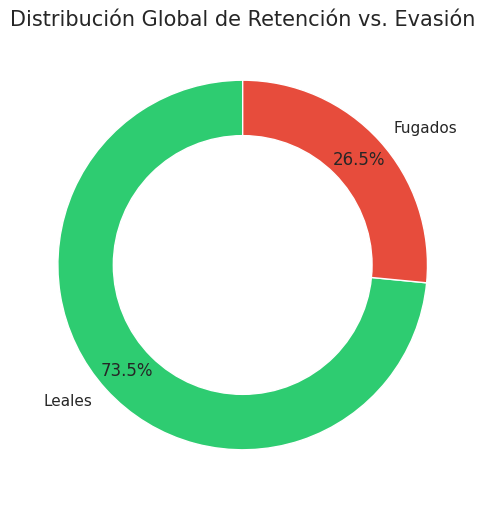

In [132]:
plt.figure(figsize=(6, 6))
plt.pie([total_clientes - clientes_fugados, clientes_fugados],
        labels=['Leales', 'Fugados'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#2ecc71', '#e74c3c'],
        pctdistance=0.85)

centro_circulo = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

plt.title('Distribución Global de Retención vs. Evasión', fontsize=15)
plt.show()

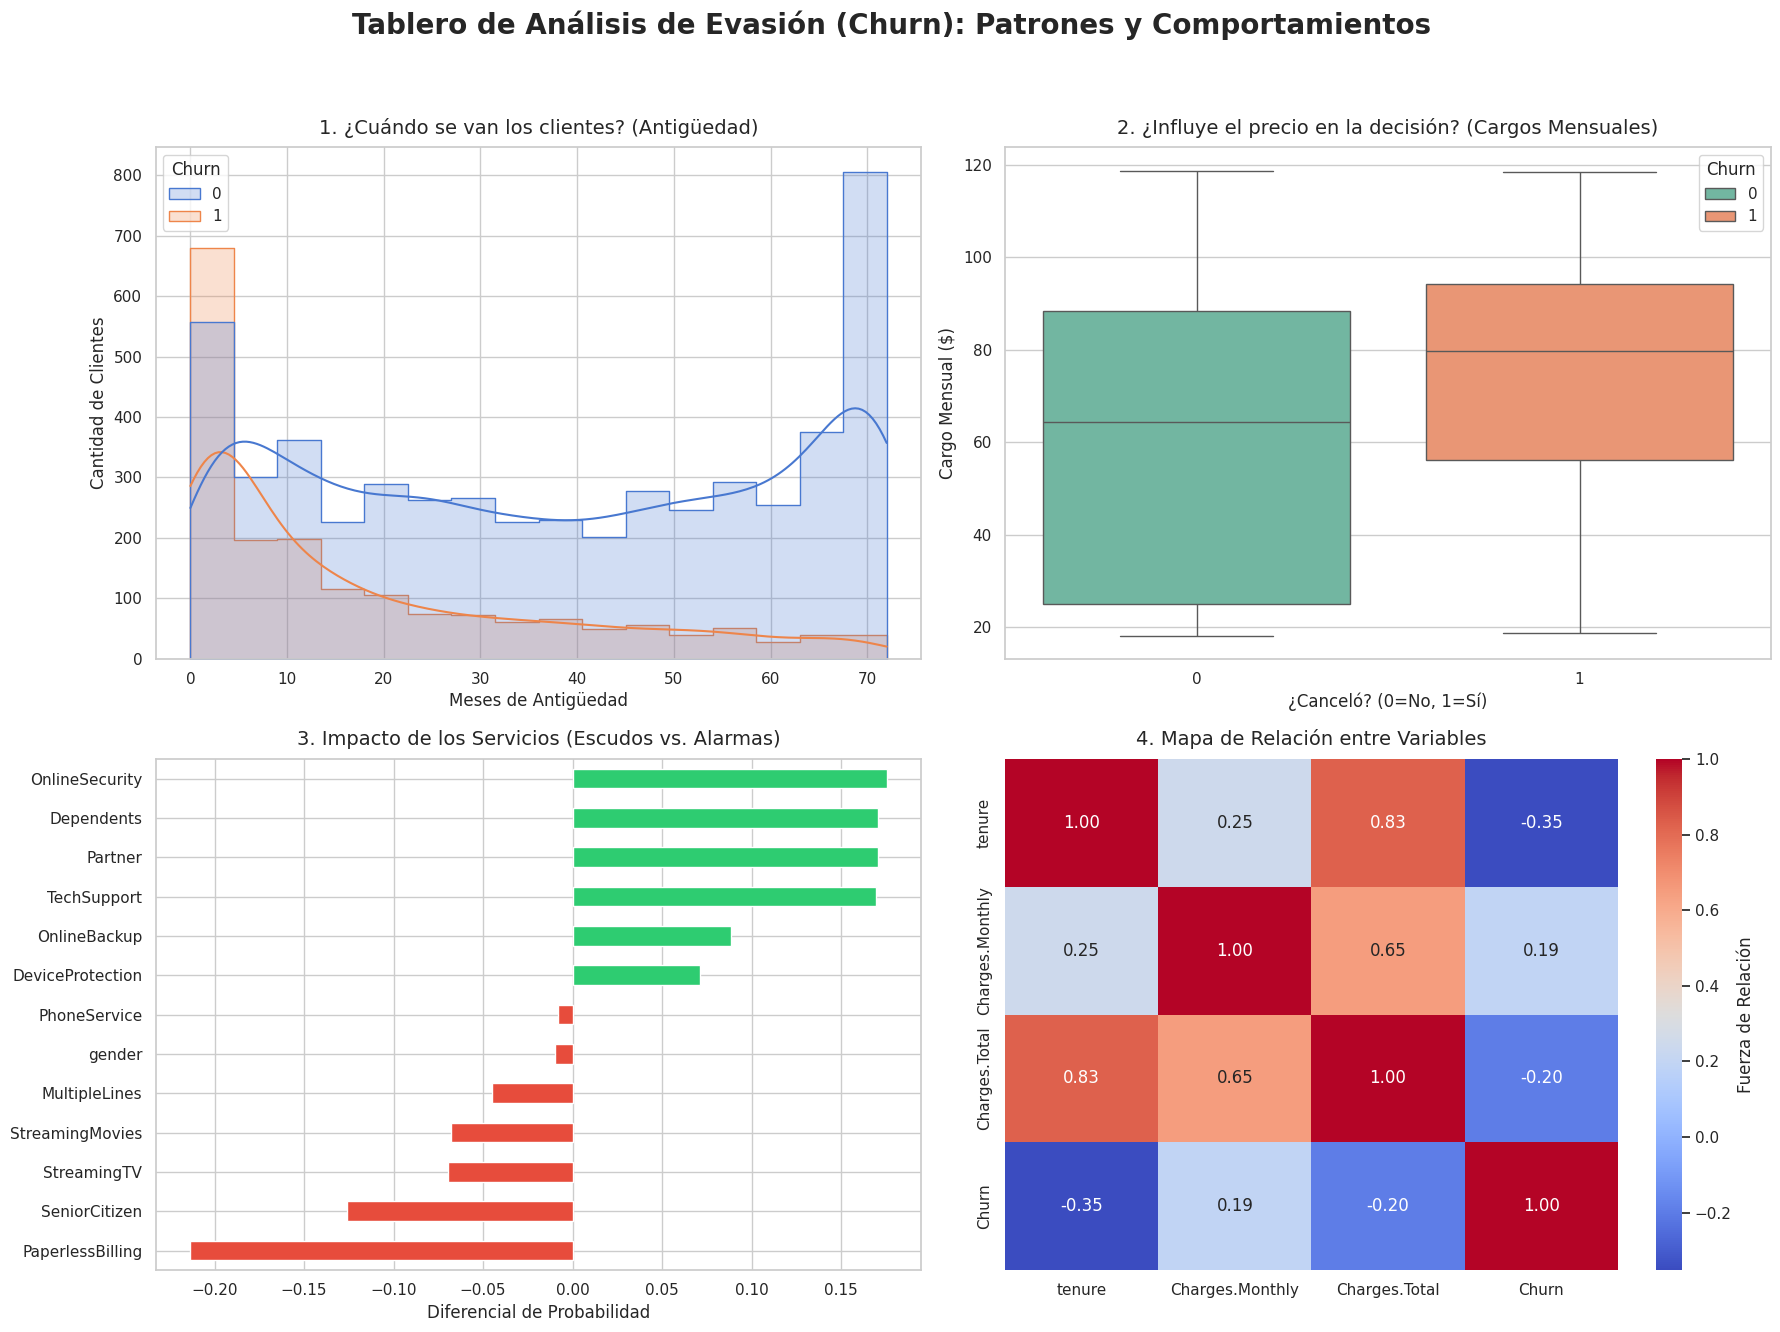

In [133]:


# 1. Configuración estética profesional
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Tablero de Análisis de Evasión (Churn): Patrones y Comportamientos', fontsize=20, fontweight='bold')

# --- GRÁFICO 1: Histograma de Tenure ---
sns.histplot(data=datos, x='tenure', hue='Churn', kde=True, ax=axes[0,0], palette='muted', element="step")
axes[0,0].set_title('1. ¿Cuándo se van los clientes? (Antigüedad)', fontsize=14, pad=10)
axes[0,0].set_xlabel('Meses de Antigüedad', fontsize=12)
axes[0,0].set_ylabel('Cantidad de Clientes', fontsize=12)

# --- GRÁFICO 2: Boxplot de Charges.Monthly ---
sns.boxplot(x='Churn', y='Charges.Monthly', data=datos, ax=axes[0,1], palette='Set2', hue='Churn')
axes[0,1].set_title('2. ¿Influye el precio en la decisión? (Cargos Mensuales)', fontsize=14, pad=10)
axes[0,1].set_xlabel('¿Canceló? (0=No, 1=Sí)', fontsize=12)
axes[0,1].set_ylabel('Cargo Mensual ($)', fontsize=12)

# --- GRÁFICO 3: Diferencial de Servicios ---
# Nota: Usamos la variable 'analisis_fuga' que calculamos previamente
diferencial_data = analisis_fuga['Diferencia'].sort_values()
colores_barras = ['#e74c3c' if x < 0 else '#2ecc71' for x in diferencial_data]
diferencial_data.plot(kind='barh', ax=axes[1,0], color=colores_barras)
axes[1,0].set_title('3. Impacto de los Servicios (Escudos vs. Alarmas)', fontsize=14, pad=10)
axes[1,0].set_xlabel('Diferencial de Probabilidad', fontsize=12)

# --- GRÁFICO 4: Heatmap de Correlación ---
cols_num = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Churn']
sns.heatmap(datos[cols_num].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1,1], cbar_kws={'label': 'Fuerza de Relación'})
axes[1,1].set_title('4. Mapa de Relación entre Variables', fontsize=14, pad=10)

# Ajuste final de espacio entre gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.savefig
plt.show()



---


##**🔹 4. Conclusiones e Insights**

1.   **Fuga Infantil**: La empresa tiene un problema de retención temprana. Si el cliente no supera el umbral de los 12 meses, la probabilidad de perderlo es máxima.

2.   **El "Efecto Soporte"**: Los servicios de valor agregado (seguridad y soporte) no son solo ingresos extra; son herramientas de fidelización. Un cliente con soporte es un cliente que no se va.

3.  **Barrera Económica**: El perfil del desertor es un cliente que paga cargos altos, posiblemente sin beneficios de lealtad o descuentos por contrato a largo plazo.  


---


##**🔹 5. Recomendaciones Estratégicas**
Basado en los hallazgos, se sugieren las siguientes acciones:

*  **Programa "Supervivencia Año 1"**: Implementar una campaña de fidelización proactiva entre los meses 6 y 10, ofreciendo beneficios exclusivos para clientes nuevos que están por llegar a su mediana de fuga.

*  **Venta Cruzada Protectora**: Incentivar la contratación de OnlineSecurity y TechSupport mediante descuentos en el paquete básico. Estos servicios actúan como barreras de salida.

*  **Migración de Pago**: Ofrecer un pequeño descuento único a los clientes que migren de Electronic Check a métodos de pago automáticos (Tarjeta de Crédito o Transferencia), reduciendo la fricción mensual del pago manual.

*  **Revisión de Facturación Digital**: Auditar el proceso de PaperlessBilling para asegurar que las facturas sean claras y no generen desconfianza o sorpresas en los cargos.


